In [4]:
import tensorflow as tf

In [5]:
a  = tf.constant([10])
b  = tf.constant([20])

In [8]:
c = tf.add(a, b)

In [9]:
session = tf.Session()

In [12]:
result = session.run(c)
print result

session.close()

[30]


In [13]:
print result

[30]


In [14]:
with tf.Session()  as session:
    result = session.run(c)
    print result

[30]


In [15]:
tf.device

<function tensorflow.python.framework.ops.device>

### Variables in Tensorflow

In [24]:
state = tf.Variable(0) # Variable a with initial value of 0
one = tf.constant(1)

new_value = tf.add(state, one)
update = tf.assign(state, new_value)

In [26]:
init_op = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [29]:
with tf.Session() as session:
    session.run(init_op)
    print session.run(state)
    
    print "\n=================="
    for _ in range(4):
        session.run(update)
        print session.run(state)

0

1
2
3
4


### Placeholders

In [31]:
a = tf.placeholder(tf.float32)
print a

Tensor("Placeholder_1:0", dtype=float32)


In [36]:
b = a *2
print b

Tensor("mul_2:0", dtype=float32)


In [39]:
with tf.Session() as sess:
    result = sess.run(b, feed_dict={a:4.5})
    print result

9.0


### Linear Regression with Tensorflow

In [62]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [43]:
x = np.arange(0.0, 5.0, 0.1)
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9])

In [46]:
x_data = np.random.rand(100).astype(np.float32)

In [47]:
y_data = x_data *3 +2
y_data = np.vectorize(lambda y:y + np.random.normal(loc=0.0, scale=0.1))(y_data)

In [48]:
zip(x_data, y_data)[0:5]

[(0.94186872, 4.745353156972743),
 (0.74648345, 4.3242126716667748),
 (0.98523188, 5.0169789371305997),
 (0.60819137, 3.6673943784954424),
 (0.029030455, 2.0468251409493865)]

In [49]:
a = tf.Variable(1.0)
b = tf.Variable(0.2)
y = a*x_data +b

In [50]:
loss = tf.reduce_mean(tf.square(y - y_data))

In [54]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

<tf.Operation 'GradientDescent_1' type=NoOp>

In [57]:
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [58]:
train_data = []
for step in range(100):
    evals = sess.run([train, a, b])[1:]
    if step % 5 == 0:
        print step, evals
        train_data.append(evals)

0 [2.4495339, 2.9329736]
5 [2.4215651, 2.2877512]
10 [2.5843375, 2.2062962]
15 [2.6959651, 2.1501107]
20 [2.7726073, 2.1115348]
25 [2.8252289, 2.0850492]
30 [2.8613584, 2.0668643]
35 [2.8861644, 2.0543787]
40 [2.9031959, 2.0458064]
45 [2.9148893, 2.0399208]
50 [2.9229181, 2.0358799]
55 [2.9284303, 2.0331054]
60 [2.932215, 2.0312004]
65 [2.934814, 2.0298922]
70 [2.9365981, 2.0289943]
75 [2.9378233, 2.0283775]
80 [2.9386647, 2.0279541]
85 [2.9392419, 2.0276635]
90 [2.9396384, 2.0274639]
95 [2.9399107, 2.0273271]


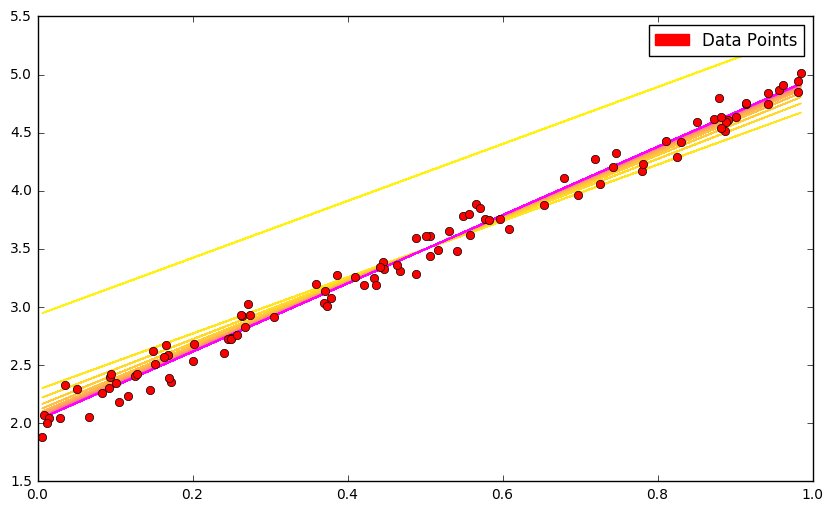

In [63]:
converter = plt.colors
cr, cg, cb = (1.0, 1.0, 0.0)

for f in train_data:
    cb += 1.0/len(train_data)
    cg -= 1.0/len(train_data)
    
    if cb > 1.0: 
        cb = 1.0
    if cg < 0.0: 
        cg = 0.0
        
    [a, b] = f    
    f_y = np.vectorize(lambda x : a*x +b)(x_data)
    line = plt.plot(x_data, f_y)
    plt.setp(line, color=(cr, cg, cb))
    
plt.plot(x_data, y_data, 'ro')

green_line = mpatches.Patch(color='red', label='Data Points')
plt.legend(handles = [green_line])

plt.show()

### Activation Function

In [64]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [65]:
def plot_act(i=1.0, actfunc=lambda x: x):
    ws = np.arange(-0.5, 0.5, 0.05)
    bs = np.arange(-0.5, 0.5, 0.05)
    
    X, Y = np.meshgrid(ws, bs)    
    os = np.array([actfunc(tf.constant(w*1 +b)).eval(session=sess) for w,b in zip(np.ravel(X), np.ravel(Y))])
    Z = os.reshape(X.shape)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1)

In [66]:
session = tf.Session();

i = tf.constant([1.0, 2.0, 3.0], shape=[1, 3])

# Create a matrix of weights
w = tf.random_normal(shape=[3, 3])

# Create a vector of biases
b = tf.random_normal(shape=[1, 3])

def func(x):
    return x

act = func(tf.matmul(i, w) +b)

# Valuate the tensor to numpy array
act.eval(session=sess)

array([[ 0.43175867, -1.82148874, -3.30169511]], dtype=float32)

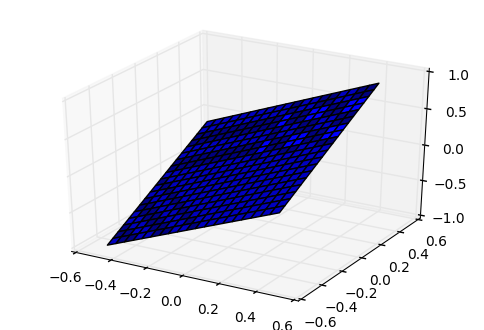

In [67]:
plot_act(1.0, func)

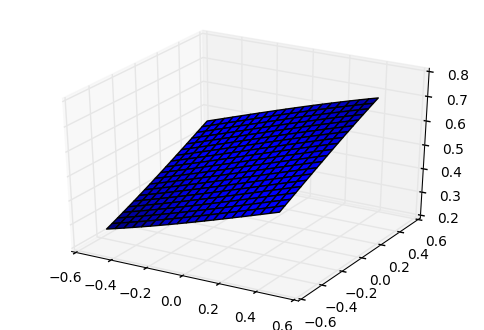

In [68]:
plot_act(1.0, tf.sigmoid)

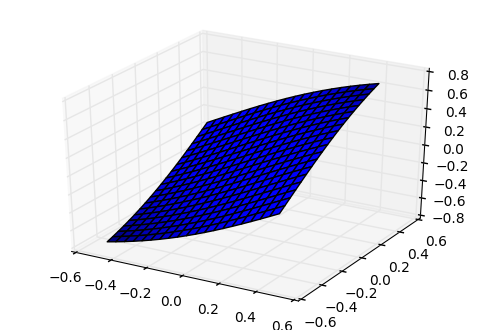

In [69]:
plot_act(1.0, tf.tanh)

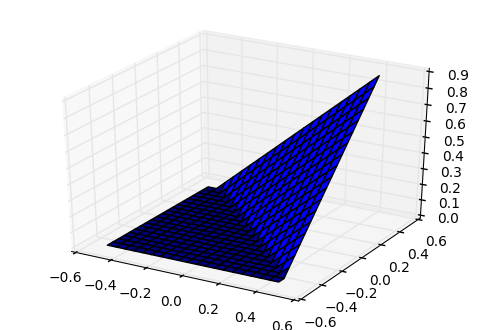

In [71]:
plot_act(1.0, tf.nn.relu)